In [36]:
# df_concern = pd.read_csv('persons_of_concern.csv')
# df_concern

### Pre-Processing 
- Load Data
- Data Cleansing
- Feature Extraction

In [38]:
import pandas as pd
demo_df = pd.read_csv('demographics.csv')

<AxesSubplot:>

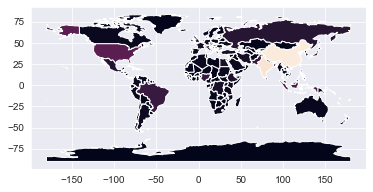

In [39]:
import geopandas as gpd
import pandas as pd
# load the naturalearth_lowres dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.name.unique()
world.plot('pop_est')

In [40]:
df = pd.read_csv('time_series.csv', low_memory=False)
df =df[df['Population type'] == 'Refugees (incl. refugee-like situations)'] #agg refugee data

#cleanse
df['Value']= df['Value'].map(lambda x: x.replace('*', '0')) 
df.rename(columns = {'Country / territory of asylum/residence': 'Country'}, inplace=True) 

df['Country'] = df['Country'].map(lambda x: x.replace('Viet Nam', 'Vietnam').replace('Iran (Islamic Rep. of)',
'Iran').replace('China, Macao SAR','China').replace('Syrian Arab Rep.','Syria').replace('Rep. of Korea',
'South Korea').replace('Dem. Rep. of the Congo', 'Dem. Rep. Congo').replace('Czech Rep.', 
'Czechia').replace('China, Hong Kong SAR', 'China').replace('Serbia and Kosovo (S/RES/1244 (1999))',
'Serbia').replace('Venezuela (Bolivarian Republic of)', 'Venezuela').replace('Bolivia (Plurinational State of)',
'Bolivia').replace('South Sudan', 'Sudan').replace('Russian Federation', 'Russia').replace('United Rep. of Tanzania',
'Tanzania').replace('Bosnia and Herzegovina', 'Bosnia and Herz.'))

#Convert data type to Integer
df['Value'] = df['Value'].astype(int)
#df_21 = df[df['Year'] >= 2000]
tst = df.groupby('Country').agg({'Value':'sum'}).sort_values(by='Value')#, ascending=True)

tst = tst.reset_index('Country')
table = world.merge(tst, how='right', left_on=['name'], right_on=['Country'])
table = table[table['Value']!=0]
table_holders = table.iloc[:,-3:]

### World Refugee Asylum Holders by Total

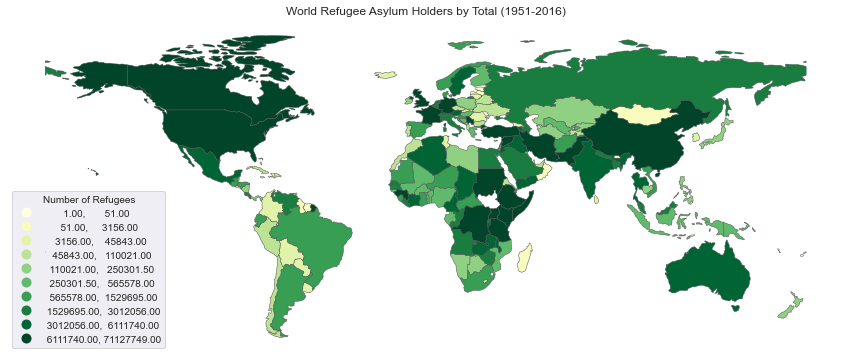

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
#cmap = plt.cm.get_cmap('plasma').reversed()
table_holders.plot(column='Value', legend=True, cmap='YlGn', scheme='quantiles', k=10,
linewidth=0.5, ax=ax, edgecolor='0.33', legend_kwds={'loc': 'lower left'})
ax.axis('off')
ax.set_title('World Refugee Asylum Holders by Total (1951-2016)')
ax.get_legend().set_title('Number of Refugees')

### GUI - View by Year

In [ ]:
import geopandas as gpd  #REPLACE VAR NAMES IN OTHER CODE BLOCK 
import tkinter as tk
from tkinter import simpledialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import pandas as pd


# Prompt the user for the year
root = tk.Tk()
root.withdraw()
year = simpledialog.askstring(title="Enter Year", prompt="Please enter a year to aggregate:")

# Read the data and aggregate for the specified year
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv('time_series.csv', low_memory=False)
df = df[df['Population type'] == 'Refugees (incl. refugee-like situations)']
df['Value'] = df['Value'].map(lambda x: x.replace('*', '0'))
df.rename(columns={'Country / territory of asylum/residence': 'Country'}, inplace=True)

df['Country'] = df['Country'].map(lambda x: x.replace('Viet Nam', 'Vietnam').replace('Iran (Islamic Rep. of)',
'Iran').replace('China, Macao SAR','China').replace('Syrian Arab Rep.','Syria').replace('Rep. of Korea',
'South Korea').replace('Dem. Rep. of the Congo', 'Dem. Rep. Congo').replace('Czech Rep.', 
'Czechia').replace('China, Hong Kong SAR', 'China').replace('Serbia and Kosovo (S/RES/1244 (1999))',
'Serbia').replace('Venezuela (Bolivarian Republic of)', 'Venezuela').replace('Bolivia (Plurinational State of)',
'Bolivia').replace('South Sudan', 'Sudan').replace('Russian Federation', 'Russia').replace('United Rep. of Tanzania',
'Tanzania').replace('Bosnia and Herzegovina', 'Bosnia and Herz.'))
df['Value'] = df['Value'].astype(int)
df = df[df['Year'] == int(year)]
tst = df.groupby('Country').agg({'Value': 'sum'}).sort_values(by='Value')

# Merge the data with the world map and create the world plot viz
tst = tst.reset_index('Country')
table = world.merge(tst, how='right', left_on=['name'], right_on=['Country'])
table = table[table['Value'] != 0]
table_holders = table.iloc[:, -3:]
fig = Figure(figsize=(15,10))
ax = fig.add_subplot(111)
#cmap = plt.cm.get_cmap('plasma').reversed()
table_holders.plot(column='Value', legend=True, cmap='YlGn', scheme='quantiles', k=10,
linewidth=0.5, ax=ax, edgecolor='0.33', legend_kwds={'loc': 'lower left'})
ax.axis('off')
ax.set_title(f'World Refugee Asylum Holders by Total ({year})')

# Initialize the tkinter window and canvas
root = tk.Tk()
root.title(f"World Refugee Asylum Holders ({year})")
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()

# Pack cancas
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Run the tkinter event loop
tk.mainloop()


## World Refugee Origins

In [42]:
df['Origin'] = df['Origin'].map(lambda x: x.replace('Viet Nam', 'Vietnam').replace('Iran (Islamic Rep. of)',
'Iran').replace('China, Macao SAR','China').replace('Syrian Arab Rep.','Syria').replace('Rep. of Korea',
'South Korea').replace('Dem. Rep. of the Congo', 'Dem. Rep. Congo').replace('Czech Rep.', 
'Czechia').replace('China, Hong Kong SAR', 'China').replace('Serbia and Kosovo (S/RES/1244 (1999))',
'Serbia').replace('Venezuela (Bolivarian Republic of)', 'Venezuela').replace('Bolivia (Plurinational State of)',
'Bolivia').replace('South Sudan', 'Sudan').replace('Russian Federation', 'Russia').replace('United Rep. of Tanzania',
'Tanzania').replace('Bosnia and Herzegovina', 'Bosnia and Herz.'))


origin_df =  df.groupby('Origin').agg({'Value':'sum'})
origin_df.rename(columns={'Value': 'Refugees'}, inplace=True)
origin_df = origin_df.reset_index('Origin')
origin_df = world.merge(origin_df, how='right', left_on=['name'], right_on=['Origin'])
origin_df = origin_df[origin_df['geometry']!=None]

In [43]:
origin_df['Refugees'] = origin_df['Refugees']/1000000 #convert to millionths

In [44]:
import geopandas as gpd
import folium

#map object
m = folium.Map(location=[0, 0], zoom_start=2)

# GeoJSON layer
folium.GeoJson(origin_df).add_to(m)

#basemap
folium.TileLayer('OpenStreetMap').add_to(m)

folium.Choropleth(
    geo_data=origin_df,
    name='Reds',
    data=origin_df,
    columns=['Origin', 'Refugees'],
    key_on='feature.properties.Origin',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Refugee Origins Count (In Millions)',
    threshold_scale=[0, 0.09, 0.5, 1, 3, 5, 10, 15, 25, 129] #add more strategically
).add_to(m)

tooltip = folium.GeoJsonTooltip(fields=['Origin', 'Refugees'], aliases=['Country', 'Refugees (Millions)'], 
                                localize=True)

folium.GeoJson(
    origin_df,
    name='geojson',
    tooltip=tooltip,
    style_function=lambda feature: {
        'fillColor': 'YlGn',
        'color': 'black',
        'weight': 0.5,
        'dashArray': '5, 5'
    }
).add_to(m)

# Add a layer control to the map to toggle the population data layer on and off
folium.LayerControl().add_to(m)


m 


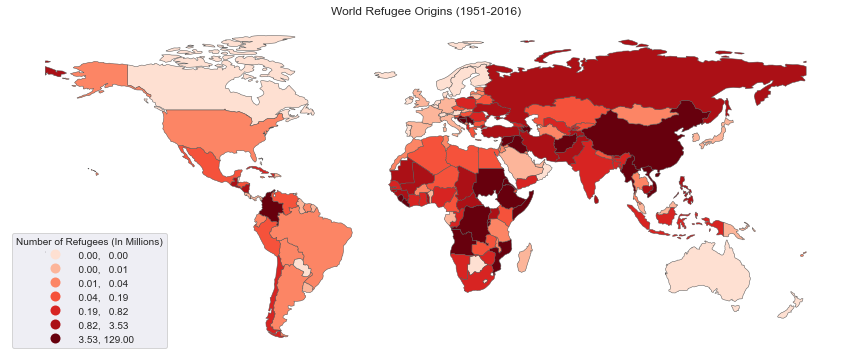

In [45]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

origin_df1 = origin_df[origin_df['Refugees'] >= 0.0001]
# Create a custom colormap that goes from light to dark and highlights high values with red
colors = ['#FEE0D2', '#FCBBA1', '#FC9272', '#FB6A4A', '#EF3B2C', '#CB181D', '#A50F15', '#67000D']
cmap = LinearSegmentedColormap.from_list('light_to_dark_red', colors, N=256)

# Plot the choropleth map using the custom colormap
fig, ax = plt.subplots(figsize=(15,10))
origin_df1.plot(column='Refugees', legend=True, cmap=cmap, scheme='quantiles', k=7, linewidth=0.5, ax=ax, edgecolor='0.33', legend_kwds={'loc': 'lower left'})
ax.axis('off')
ax.set_title('World Refugee Origins (1951-2016)')
ax.get_legend().set_title('Number of Refugees (In Millions)')

## Refugees in 21st Century Relative to Host Country Population

In [46]:
portion_df = df[df['Year']>=2000]
portion_df = portion_df.groupby('Country').agg({'Value': 'sum'})
portion_df = portion_df.reset_index('Country')
portion_df = world.merge(portion_df, how='right', left_on=['name'], right_on=['Country'])
portion_df = table[table['Value'] != 0]
portion_df = portion_df[portion_df['pop_est'].isna()!=True]
portion_df.rename(columns={'Value':'Refugees'}, inplace=True)
portion_df['Proportion_pop'] = portion_df['Refugees']/portion_df['pop_est']
portion_df['Proportion_pop'] = portion_df['Proportion_pop'].apply(lambda x: .99 if x > 1 else x)
#portion_df.sort_values('Proportion_pop', ascending =False).iloc[1:5]

Text(0.5, 1.0, 'Refugees in 21st Century as % of Host Country Population')

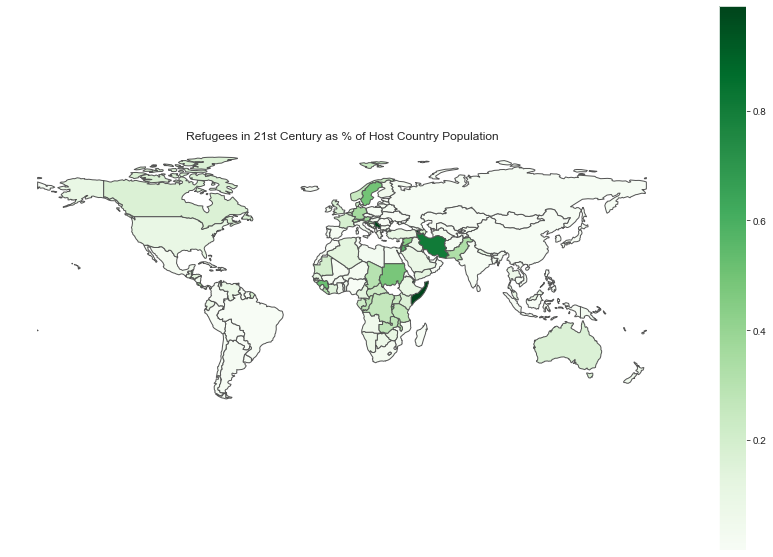

In [47]:
fig, ax = plt.subplots(figsize=(15,10))
portion_df.plot(column = 'Proportion_pop', legend=True, cmap='Greens', ax=ax, edgecolor='0.33')
ax.axis('off')
ax.set_title('Refugees in 21st Century as % of Host Country Population')
#fig.savefig('refugee_holdings.png', dpi=300, bbox_inches='tight')

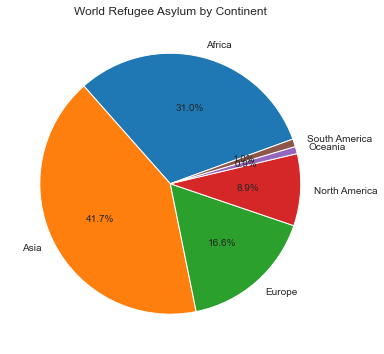

In [48]:

portion_df = portion_df.groupby('continent').agg({'Refugees': sum, 'pop_est': sum})
# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(portion_df['Refugees'], labels=portion_df.index, autopct='%1.1f%%', startangle=20)
ax.set_title('World Refugee Asylum by Continent')

# Show the plot
plt.show()

## Demographic Analytics

In [49]:
import numpy as np 
import requests
def gender_immigrants_byregion(country):
    while country not in demo_df['Country / territory of asylum/residence'].unique():
        country = input('Enter a valid World Country: ')
    afg_df = demo_df[demo_df['Country / territory of asylum/residence']==country]
    afg_df = afg_df[(afg_df['Location Name']!= 'Various')&(afg_df['Location Name'] != '*')]# & (afg_df['Location Name']!= 'Zehray Dasht')]
    afg_df['Location Name'] = [town.split(':')[0].strip() for town in afg_df['Location Name']]
    afg_df['Location Name'] = afg_df['Location Name'].map(lambda x: x.replace(' ', '') if x == 'Day Kundi' else x)
 #   afg_df = afg_df[(afg_df['Location Name'] != 'Uruzghon') & (afg_df['Location Name'] != '*')]
    afg_df = afg_df[(afg_df['F: Total'] != '*') &(afg_df['M: Total'] != '*') ]
    afg_df.reset_index(inplace=True)
    afg_df_copy = afg_df.copy()
    afg_df_copy.dropna(subset = ['F: Total','M: Total'], inplace=True)
    afg_df_copy['F: Total'], afg_df_copy['M: Total'] = afg_df_copy['F: Total'].astype(float),\
                                                        afg_df_copy['M: Total'].astype(float)
    youthf = afg_df_copy.groupby('Location Name').agg({'F: Total': sum, 'M: Total': sum})

    youthf = afg_df_copy.groupby('Location Name').agg({'F: Total': sum, 'M: Total': sum})
    youthf = youthf.reset_index()
    lat_ls, long_ls = [],[]
    dic = {}
    drop_index = []
    cnt = -1 
    for city in youthf['Location Name']:
        cnt +=1
        try:
            print(city)
            if city in dic.keys():
                lat_ls.append(dic[city][0])
                long_ls.append(dic[city][1])
                print('retrieved from dictionary')
            else:
                url = f'https://nominatim.openstreetmap.org/search?q={city}&format=json'
                response = requests.get(url).json()
                print(response[0]['lat'], response[0]['lon'])
                dic[city] = [response[0]['lat'], response[0]['lon']]
                lat_ls.append(response[0]['lat'])
                long_ls.append(response[0]['lon'])
                
        except:
            print('error in API')
            drop_index.append(cnt)
            continue
            
    youthf.drop(drop_index, inplace=True)        
    youthf['Lat'], youthf['Lon'] = lat_ls, long_ls
    m = folium.Map(location=[np.mean(youthf['Lat'].astype(float)), np.mean(youthf['Lon'].astype(float))], zoom_start=5)

    # Add a marker at a specific location
    for index in range(len(youthf)):
        folium.Marker(location=[youthf['Lat'].iloc[index], youthf['Lon'].iloc[index]],
                      popup=f"Territory: {youthf['Location Name'].iloc[index]}, Male: {youthf['M: Total'].iloc[index]}, Female:{youthf['F: Total'].iloc[index]}").add_to(m)
    return m
    
gender_immigrants_byregion('Uganda') #TRY Afghanistan or Uganda
    

Adjumani
3.23712805 31.785824621769088
Arua
3.0014096 31.009352707358268
Hoima
1.4636618499999998 31.133294858081797
Ikafe
3.2987961 31.3438355
Impevi
error in API
Imvepi
3.2655367 31.27567
Kampala
0.3177137 32.5813539
Kayaka II
error in API
Kiryandongo
1.99357995 32.049817906773065
Kitgum
3.44388455 33.484117182439014
Koboko
3.5351114 30.98482066892641
Kyaka 2
-1.2522979 31.4224552
Kyaka II
0.35918300000000003 31.081027118400222
Kyangwali
1.2273353 30.8192486
Kyriandongo
error in API
Madi-Okollo
2.86745115 31.238308842011712
Masindi
1.6917534 31.773752436319583
Matanda
-18.6275922 34.0692916
Moyo
3.6658888 31.754108928428966
Nakivale
-0.7818948 30.9475798
Okollo
2.6520198 31.1453527
Oruchinga
-0.9273303 30.7520512
Pakelle
3.35685 31.85477
Palorinya
3.477398 31.61213
Rhino Camp
2.99951805 31.287360988904283
Rhinocamp
error in API
Rwamanja
0.283333 30.6
Uganda
1.5333554 32.2166578
Yumbe
3.4914105500000003 31.285914925830156


# Modeling 
- Time Series Linear Regression
- Simple Exponential Smoothing

In [50]:
us_df = df[df['Country']=='United States of America'].groupby('Year').agg({'Value':'sum'})
us_df.reset_index('Year', inplace=True)
us_df['Tot_refugees'] = us_df['Value'].cumsum()

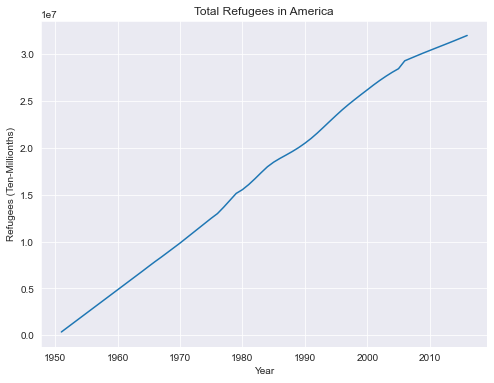

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Use Seaborn to plot the data on the subplot
sns.set_style('darkgrid')
sns.lineplot(x=us_df['Year'], y=us_df['Tot_refugees'])

plt.title('Total Refugees in America')
plt.xlabel('Year')
plt.ylabel('Refugees (Ten-Millionths)')

# Show the graph
plt.show()


## ML Linear Regression 
### $$ŷ = b₀ + b₁x₁ + b₂x₂..$$
- .80/.20 Split
- 3-Fold Cross Validation

#### This model intends to predict the total number of refugees the United Stakes have intaken since 1951 on basis of the year
#### b₁ (slope) indicates the estimated  number of refugees per year guaranteed asylum (total increasing by b₁

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np

#Reshape to 2D
X = np.array(us_df.Year).reshape(-1, 1)

#Cross Validation Score -- (R2 Metric) (3-Fold (44-train, 22-test, (66 total)))
scores = cross_val_score(LinearRegression(), X, us_df.Tot_refugees, cv=3, scoring='r2')
print(f'Cross Validation Score (K=3): {scores.mean()}')

Cross Validation Score (K=3): 0.92434275228444


In [53]:
#Split data .8 train / .2 test
x_train, x_test, y_train, y_test = train_test_split(X, us_df.Tot_refugees, test_size = 0.2, random_state = 0)

#model development 
lr_model = LinearRegression().fit(x_train, y_train)

#Performance Evaluation 
y_pred_test = lr_model.predict(x_test)
r2_test = r2_score(y_test, y_pred_test)

y_pred_train = lr_model.predict(x_train)
r2_train = r2_score(y_train, y_pred_train)

accuracy = pd.DataFrame()
accuracy['LR'] = [r2_train, round(r2_test,3)]
accuracy.rename(index = {0:'Train', 1:'Test'}, inplace=True)
accuracy #R2 SCORE

LR
Train  0.997874
Test   0.992000

In [54]:
#Parameters
print(f'bo = {lr_model.intercept_}, b1= {lr_model.coef_[0]}, x1= Year')

bo = -999896807.014787, b1= 512679.31612992013, x1= Year


In [55]:
#View Mean Error (ME) + Predictions against Actual
us_df_modeling = us_df.copy()
#pd.set_option('display.float_format', lambda x: '%.0f' % x)
us_df_modeling['LR']=lr_model.predict(X)
us_df_modeling['Error'] = (us_df_modeling.Tot_refugees - us_df_modeling.LR)
us_df_modeling.head(12), print(f'Mean Error: {round(sum(us_df_modeling.Tot_refugees - us_df_modeling.LR)/len(us_df_modeling),2)}')

Mean Error: 87988.64


(    Year   Value  Tot_refugees            LR          Error
 0   1951  350000        350000  3.405388e+05    9461.245313
 1   1952  500000        850000  8.532181e+05   -3218.070817
 2   1953  500000       1350000  1.365897e+06  -15897.386947
 3   1954  500000       1850000  1.878577e+06  -28576.703077
 4   1955  500000       2350000  2.391256e+06  -41256.019207
 5   1956  500000       2850000  2.903935e+06  -53935.335337
 6   1957  500000       3350000  3.416615e+06  -66614.651467
 7   1958  500000       3850000  3.929294e+06  -79293.967597
 8   1959  500000       4350000  4.441973e+06  -91973.283727
 9   1960  500000       4850000  4.954653e+06 -104652.599856
 10  1961  500000       5350000  5.467332e+06 -117331.915986
 11  1962  500000       5850000  5.980011e+06 -130011.232116,
 None)

## Conf. Interval 
##  $$CI = [(ŷ - t * SE), (ŷ + t * SE)]$$

## $$SE = \sqrt{\text{MSE} \times \left(1 + \frac{1}{n} + \frac{(X_\text{new} - \bar{X})^2}{(n-1) \times \text{Var}(X)}\right)}$$

In [14]:
from scipy.stats import t
def predictions():
    year = [[int(input('Enter a Year to view Estimated Refugee Count 🇺🇸: '))]]
    prediction = lr_model.predict(year)[0] #gather y_pred (y-hat)
    
    n, x_bar = len(y_train), np.mean(x_train)
    
    X_var = np.var(x_train, axis=0, ddof=1) #Calculate Var

    MSE = np.mean((y_train - lr_model.predict(x_train))**2) #CALCULATE MSE

    SE = np.sqrt(MSE * (1 + 1/n + (year - x_bar)**2 / ((n-1)*X_var))) #CALCULATE SE
    
    t_value = t.ppf(0.975, df=n-2) #t-table value (n-2)
    CI = [prediction - t_value * SE, prediction + t_value * SE] #95% - lower,upper
    
    print(f'Estimated Refugee Count Year {year[0][0]}: {(int(lr_model.predict(year)[0]))} +{int(lr_model.predict(year)[0])-us_df.Tot_refugees.iloc[-1]}-From Current yr.') #Prediction for 'n' yr
    print(f'95% Confidence - ({int(CI[0][0][0])}, {int(CI[1][0][0])})') 

predictions()

Enter a Year to view Estimated Refugee Count 🇺🇸: 2022
Estimated Refugee Count Year 2022: 36740770 +4737726-From Current yr.
95% Confidence - (35751110, 37730429)


In [57]:
#Visualize Model Performance (Interactive graph)
import plotly.express as px
us_df_modeling.rename(columns={'Tot_refugees': 'Refugees (Actual)', 'LR': 'LR Predictions'}, inplace=True)
fig = px.line(us_df_modeling,
              x='Year',
              y=["Refugees (Actual)", "LR Predictions"],
              labels={'variable': 'Legend',
                     "value": "Refugees"
                 },
              title='Total Refugees 🇺🇸 (Actual v. Regression Model)')
fig.update_layout(template="plotly_dark")

fig.show()

## Simple Exponential Smoothing
$$F_t = aX_{t-1} + (1-a)F_{t-1}$$

$F_t$ is the forecast for time $t$, $X_{t-1}$ is the observation at time $t-1$, and $a$ is a weight parameter between 0 and 1

Higher values of $a$ place greater emphasis on recent target values

In [ ]:
## Try U.S., Belgium, and Ukraine

In [60]:
import plotly.graph_objects as go
import plotly.express as px

class Simple_Exponential(object):
    def __init__(self):
        self.country = input('Enter Country to Model: ')
        while self.country not in df.Country.unique():
            print([x for x in df.Country.unique()])
            self.country = input('Enter Country to Model from above options: ')
        self.country_df = df[df['Country']==self.country].groupby('Year').agg({'Value':'sum'})
        self.country_df.reset_index('Year', inplace=True)
        
    def Model(self, alpha):
        global index
        index = 0
        ses_forecasts = [self.country_df.Value[0]]
        self.alpha = alpha
        
        while index < len(self.country_df.iloc[1:]):
        #    print(f'{alpha}*{self.country_df.Value.iloc[index]} + (1-{alpha}) * {ses_forecasts[index]} = {alpha*self.country_df.Value.iloc[index] + (1-alpha) * ses_forecasts[index]}')
            ses_forecasts.append(self.alpha*self.country_df.Value.iloc[index] + (1-self.alpha) * ses_forecasts[index])
            index+=1


        MAPE = np.mean(abs((self.country_df.Value - ses_forecasts))/self.country_df.Value)
        self.country_df_ses = pd.DataFrame({'Year': self.country_df.Year, 'Refugee Intake': self.country_df.Value, 'SES':ses_forecasts,
                                 '||%Error':abs((self.country_df.Value-ses_forecasts))/self.country_df.Value})


        self.country_df_ses #Forecasted + Actual Values + Year in this df
        
        if self.country != 'United States of America': 
            fig = px.line(self.country_df_ses,
                  x='Year',
                  y=["Refugee Intake", "SES"],
                  labels={'variable': 'Legend',
                         "value": "Refugees"
                     },
                  title= f'{self.country} Refugee Intake by Year (Actual v. Simple Exponential Smoothing Model)')
            fig.show()

 
        elif self.country == 'United States of America':
            self.us_events = [('Vietnam War', 1955), ('9/11', 2001), ('Vietnam War END', 1975), ('Cold War END', 1991)]
            
            fig = px.line(self.country_df_ses,
                  x='Year',
                  y=["Refugee Intake", "SES"],
                  labels={'variable': 'Legend',
                         "value": "Refugees"
                     },
                  title= f'{self.country} Refugee Intake by Year (Actual v. Simple Exponential Smoothing Model)')
            
            # Add a horizontal line on major US events/wars
            for event, yr in self.us_events:
                fig.add_shape(
                    type='line',
                    x0=str(yr),
                    x1=str(yr),
                    y0=0,
                    y1=1,
                    xref='x',
                    yref='paper',
                    line=dict(color='black')
                )

                # Add text annotation
                fig.add_annotation(
                    x=str(yr),
                    y=0.5,
                    xref='x',
                    yref='paper',
                    text=str(event),
                    showarrow=False,
                    font=dict(color='black')
                )

            fig.show()

        print('MAPE:',MAPE)
        return self.country_df_ses.head(8)
    
    def predict(self):
        self.predicted_val = self.alpha*self.country_df_ses['Refugee Intake'].iloc[-1] + \
        (1-self.alpha)*self.country_df_ses['SES'].iloc[-1]
        return f'{self.country} Predicted Refugee Intake for Next Year ({self.country_df_ses["Year"].iloc[-1]+1}): {int(self.predicted_val)}'
    
    def get_df(self):
        return self.country_df_ses
    
s= Simple_Exponential()
s.Model(0.9)


Enter Country to Model: United States of America


MAPE: 0.10203483039170928


Year  Refugee Intake        SES      ||%Error
0  1951          350000  350000.00  0.000000e+00
1  1952          500000  350000.00  3.000000e-01
2  1953          500000  485000.00  3.000000e-02
3  1954          500000  498500.00  3.000000e-03
4  1955          500000  499850.00  3.000000e-04
5  1956          500000  499985.00  3.000000e-05
6  1957          500000  499998.50  3.000000e-06
7  1958          500000  499999.85  3.000000e-07

In [61]:
s.predict() #Predict 

'United States of America Predicted Refugee Intake for Next Year (2017): 272864'

Enter Country to Model: United States of America
alpha = 0.1 | MAPE = 0.22777177552628255
alpha = 0.2 | MAPE = 0.18045914865613566
alpha = 0.3 | MAPE = 0.1544904504661867
alpha = 0.4 | MAPE = 0.1368649688736753
alpha = 0.5 | MAPE = 0.12520868284092695
alpha = 0.6 | MAPE = 0.11662519751059351
alpha = 0.7 | MAPE = 0.11050706697501296
alpha = 0.8 | MAPE = 0.10571166696582919
alpha = 0.9 | MAPE = 0.10203483039170928
*Optimized alpha value: 0.9


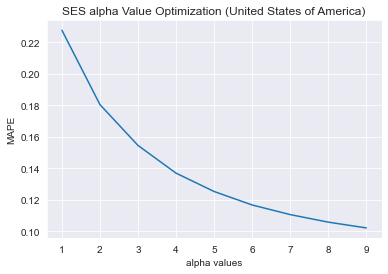

In [62]:
#Optimize
import matplotlib.pyplot as plt
country = input('Enter Country to Model: ')
while country not in df.Country.unique():
    print([x for x in df.Country.unique()])
    country = input('Enter Country to Model from above options: ')
    
country_df = df[df['Country']==country].groupby('Year').agg({'Value':'sum'})
country_df.reset_index('Year', inplace=True)

def Simple_Exponential_Optimizer(alpha):
    global index
    index = 0
    ses_forecasts = [country_df.Value[0]]
    #alpha = 0.9
    
    while index < len(country_df.iloc[1:]):
        #print(f'{alpha}*{us_df.Value.iloc[index]} + (1-{alpha}) * {ses_forecasts[index]} = {alpha*us_df.iloc[1:].Value.iloc[index] + (1-alpha) * ses_forecasts[index]}')
        ses_forecasts.append(alpha*country_df.Value.iloc[index] + (1-alpha) * ses_forecasts[index])
        index+=1

    #Performance Evaluation
    MAPE = np.mean(abs((country_df.Value - ses_forecasts))/country_df.Value)

    return MAPE

mapes = []
for i in range(1, 10, 1):
    print(f'alpha = {i/10} | MAPE = {Simple_Exponential_Optimizer(i/10.0)}')
    mapes.append(Simple_Exponential_Optimizer(i/10.0))

#Plot alpha value optimization
x,y = range(1,len(mapes)+1), mapes
plt.plot(x,y)
plt.title(f'SES alpha Value Optimization ({country})')
plt.ylabel('MAPE')
plt.xlabel('alpha values')

print('*Optimized alpha value:', (sorted(range(len(mapes)), key = lambda i: mapes[i])[0]+1)/10)